In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:

data = pd.read_csv("airdata.csv",delimiter=";")

print(data.head())
print(data.info())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [ ]:

data = data.loc[:, ~data.columns.str.contains('^Unnamed|;;')]
# List of columns to convert
numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                   'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                   'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                   'T', 'RH', 'AH']

for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Column '{col}' unique values:")
        print(data[col].unique())

Column 'Date' unique values:
['10/03/2004' '11/03/2004' '12/03/2004' '13/03/2004' '14/03/2004'
 '15/03/2004' '16/03/2004' '17/03/2004' '18/03/2004' '19/03/2004'
 '20/03/2004' '21/03/2004' '22/03/2004' '23/03/2004' '24/03/2004'
 '25/03/2004' '26/03/2004' '27/03/2004' '28/03/2004' '29/03/2004'
 '30/03/2004' '31/03/2004' '01/04/2004' '02/04/2004' '03/04/2004'
 '04/04/2004' '05/04/2004' '06/04/2004' '07/04/2004' '08/04/2004'
 '09/04/2004' '10/04/2004' '11/04/2004' '12/04/2004' '13/04/2004'
 '14/04/2004' '15/04/2004' '16/04/2004' '17/04/2004' '18/04/2004'
 '19/04/2004' '20/04/2004' '21/04/2004' '22/04/2004' '23/04/2004'
 '24/04/2004' '25/04/2004' '26/04/2004' '27/04/2004' '28/04/2004'
 '29/04/2004' '30/04/2004' '01/05/2004' '02/05/2004' '03/05/2004'
 '04/05/2004' '05/05/2004' '06/05/2004' '07/05/2004' '08/05/2004'
 '09/05/2004' '10/05/2004' '11/05/2004' '12/05/2004' '13/05/2004'
 '14/05/2004' '15/05/2004' '16/05/2004' '17/05/2004' '18/05/2004'
 '19/05/2004' '20/05/2004' '21/05/2004' '22/05/

In [ ]:

numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                   'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                   'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                   'T', 'RH', 'AH']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
print(data.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [ ]:

# Drop unnecessary columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed|;;')]

# Convert numeric columns to proper types
numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                   'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                   'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                   'T', 'RH', 'AH']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Combine Date and Time into a single Datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:

data['CO(GT)'] = data['CO(GT)'].astype(str).str.replace(',', '.').astype(float)
data['CO(GT)'] = pd.to_numeric(data['CO(GT)'].astype(str).str.replace(',', '.'), errors='coerce')
# Replace commas with dots and convert to numeric for all numeric columns
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', '.'), errors='coerce')
#print(data['CO(GT)'].head())
#print(data.info())
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)
data.drop(columns=['C6H6(GT)'], inplace=True)

CO(GT)            77.436385
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)         100.000000
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                 96.135572
RH                96.135572
AH                96.135572
Datetime           1.203674
dtype: float64


In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
data['CO(GT)'].fillna(data['CO(GT)'].mean(), inplace=True)
data['T'].fillna(data['T'].mean(), inplace=True)
data['RH'].fillna(data['RH'].mean(), inplace=True)
data['AH'].fillna(data['AH'].mean(), inplace=True)

<ipython-input-59-9b7c2efdc6dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CO(GT)'].fillna(data['CO(GT)'].mean(), inplace=True)
<ipython-input-59-9b7c2efdc6dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
data.columns = data.columns.str.strip()
data.drop(columns=['C6H6(GT)'], errors='ignore', inplace=True)

print(data.columns)
print(data.info())

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'Datetime'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9471 non-null   float64       
 1   PT08.S1(CO)    9471 non-null   float64       
 2   NMHC(GT)       9471 non-null   float64       
 3   PT08.S2(NMHC)  9471 non-null   float64       
 4   NOx(GT)        9471 non-null   float64       
 5   PT08.S3(NOx)   9471 non-null   float64       
 6   NO2(GT)        9471 non-null   float64       
 7   PT08.S4(NO2)   9471 non-null   float64       
 8   PT08.S5(O3)    9471 non-null   float64       
 9   T              9471 non-null   float64       
 10  RH             9471 non-null   float64       
 11  AH             9471 non-null 

In [ ]:
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Datetime']))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['CO(GT)'])
y = data_scaled['CO(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02673779646191245


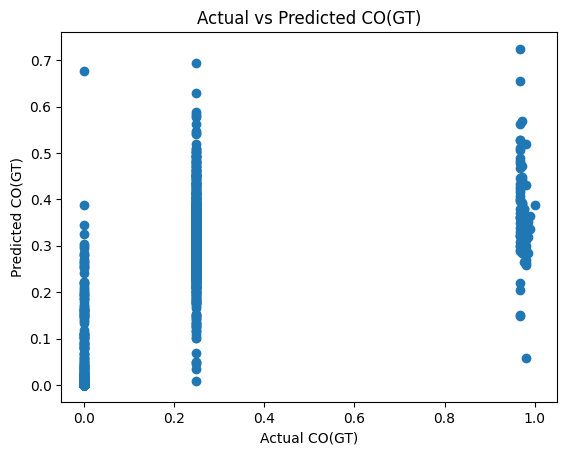

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO(GT)")
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(model, "air_quality_model.pkl")

['air_quality_model.pkl']